In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Load your dataset
# Example: Assuming your dataset is in a CSV file named 'dataset.csv'
dataset = pd.read_csv('./HDFC_3months.csv')

# Step 3: Split the dataset into features (X) and target variable (y)
X_train = dataset[['Open Price', 'High Price', 'Low Price']]  # Replace with your actual feature names
y_train = dataset['Close Price']  # Replace with your actual target variable name

# Step 4: Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df= pd.read_csv('./HDFC_1month.csv')
X_test= df[['Open Price', 'High Price', 'Low Price']]
y_test= df['Close Price']

In [2]:
# Step 5: Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Additional Statistics
# Total Sum of Squares (SST)
sst = np.sum((y_test - np.mean(y_test))**2)

# Regression Sum of Squares (SSR)
ssr = np.sum((y_pred - np.mean(y_test))**2)

# Coefficients
coefficients = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': model.coef_})

# Adjusted R-squared (R2_adj)
n = len(y_test)
k = len(X_test.columns)
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Print the statistics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Total Sum of Squares (SST): {sst}')
print(f'Regression Sum of Squares (SSR): {ssr}')
print(f'R-squared (R2): {r2}')
print(f'Adjusted R-squared (R2_adj): {r2_adj}')
print('\nCoefficients:')
print(coefficients)

Mean Squared Error (MSE): 27.542404841977234
Total Sum of Squares (SST): 12123.718043478268
Regression Sum of Squares (SSR): 11590.902530331434
R-squared (R2): 0.9477490890918365
Adjusted R-squared (R2_adj): 0.9394989452642317

Coefficients:
      Feature  Coefficient
0  Open Price    -0.635386
1  High Price     0.903432
2   Low Price     0.735960


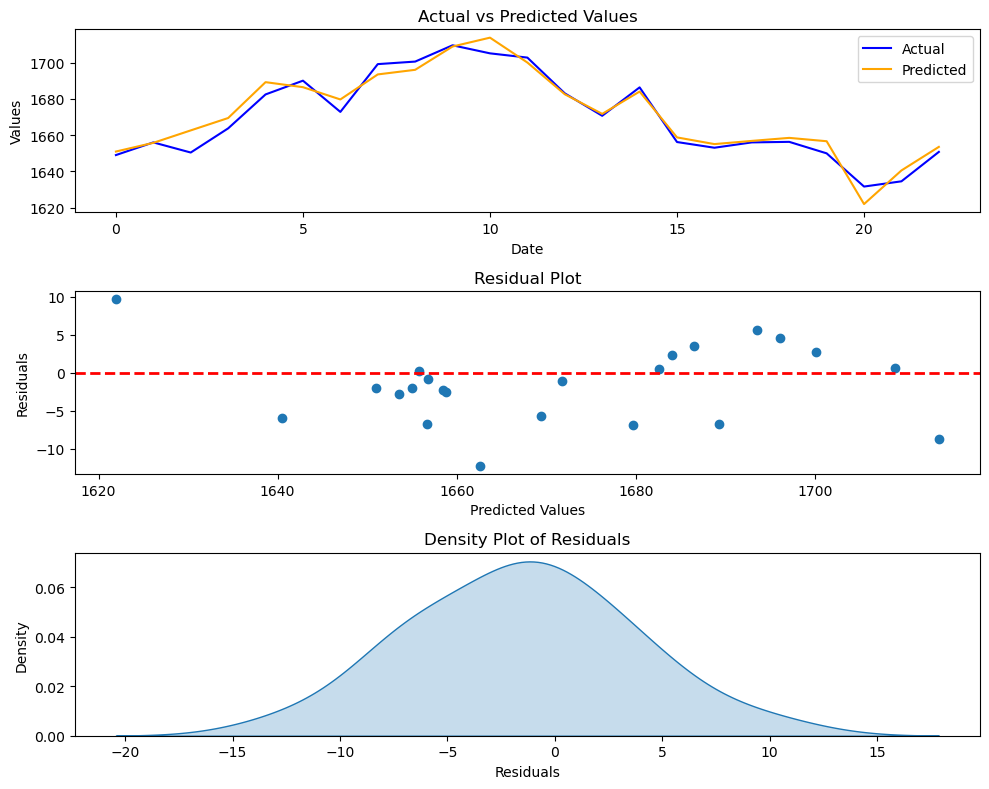

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))  # 2 rows, 1 column

# Actual vs Predicted
ax1.plot(y_test.index, y_test, label='Actual', color='blue')
ax1.plot(y_test.index, y_pred, label='Predicted', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.set_title('Actual vs Predicted Values')
ax1.legend()

# Residual Plot
residuals = y_test - y_pred
ax2.scatter(y_pred, residuals)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals')
ax2.set_title('Residual Plot')

#Density plot
sns.kdeplot(residuals, fill=True)
ax3.set_xlabel('Residuals')
ax3.set_ylabel('Density')
ax3.set_title('Density Plot of Residuals')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()